In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations

In [26]:


data = [
    {
        'vel': 2,
        'win_size': 30,
        'poly_n': 5,
        'files': ['csv/0-vel-2-ws-30-polyn-5.csv', 'csv/0-vel-2-ws-30-polyn-5-no-obstacle.csv']
    },
    #{
    #    'vel': 1,
    #    'win_size': 30,
    #    'poly_n': 5,
    #    'obstacle': 'csv/0-vel-1-ws-30-polyn-5.csv',
    #    'no-obstacle': 'csv/0-vel-1-ws-30-polyn-5-no-obstacle.csv'
    #}
]



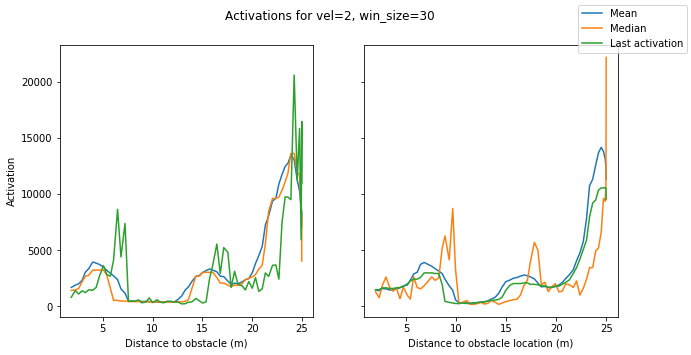

In [32]:

for dic in data:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
    
    for i, f in enumerate(dic['files']):
        df = pd.read_csv(f)
        df[ACT] = df[ACT].apply(clean_activations)
        means = df[ACT].apply(np.mean)
        medians = df[ACT].apply(np.median)
        last = df[ACT].apply(lambda a: a[-1])
        if i == 0:
            axs[i].plot(df[DIST], means, label='Mean')
            axs[i].plot(df[DIST], medians, label='Median')
            axs[i].plot(df[DIST], last, label='Last activation')
            axs[i].set_title('Approachin')
        else:
            axs[i].plot(df[DIST], means)
            axs[i].plot(df[DIST], last)
            axs[i].plot(df[DIST], medians)
    fig.legend()
    axs[0].set_xlabel('Distance to obstacle (m)')
    axs[1].set_xlabel('Distance to obstacle location (m)')
    axs[0].set_ylabel('Activation')
    fig.suptitle('Activations for vel=' + str(dic['vel']) + ', win_size=' + str(dic['win_size']))
    fig.savefig('figures/0-of-activation-vel-' + str(dic['vel']) + '.pdf')

